In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import tensorflow as tf
sess = tf.Session()

In [2]:
iris = datasets.load_iris()
binary_target = np.array([1. if x == 0 else 0 for x in iris.target])
iris_2d = np.array([[x[2],x[3]] for x in iris.data])

In [3]:
# Data placeholders and variable batch sizes have None as first dimension
batch_size = 20
x1_data = tf.placeholder(shape=[None,1],dtype=tf.float32)
x2_data = tf.placeholder(shape=[None,1],dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1],dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [4]:
# Define linear model, x2 = x1 * A + b
# See if numbers are above or below zero when plugged into x2 - x1 * A - b
# Take sigmoid to predict 1 or 0, tf has loss function with sigmoid build in
my_mult = tf.matmul(x2_data,A)
my_add = tf.add(my_mult,b)
my_output = tf.subtract(x1_data,my_add)

In [5]:
# Add sigmoid corss entropy loss function
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=my_output,labels=y_target)

In [6]:
# Tell how to optimize by declaring optimization method
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(xentropy)

In [7]:
init = tf.global_variables_initializer()
sess.run(init)

In [8]:
# Train model with 1000 iterations, feeding in three data points we need
# Print every 200th iteration
for i in range(1000):
    rand_index = np.random.choice(len(iris_2d), size=batch_size)
    rand_x = iris_2d[rand_index]
    rand_x1 = np.array([[x[0]] for x in rand_x])
    rand_x2 = np.array([[x[1]] for x in rand_x])
    rand_y = np.array([[y] for y in binary_target[rand_index]])
    sess.run(train_step, feed_dict={x1_data: rand_x1, x2_data:rand_x2, y_target: rand_y})
    if (i+1)%200==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ', b = ' + str(sess.run(b)))

Step #200 A = [[8.652362]], b = [[-3.486646]]


Step #400 A = [[10.141525]], b = [[-4.66007]]


Step #600 A = [[11.160418]], b = [[-5.324976]]
Step #800 A = [[11.77934]], b = [[-5.9583273]]


Step #1000 A = [[12.351126]], b = [[-6.393845]]


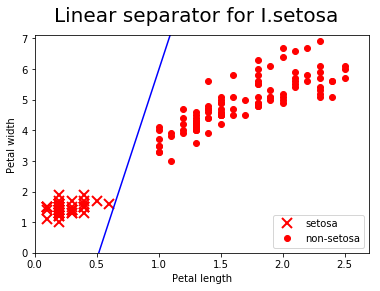

In [9]:
[[slope]] = sess.run(A)
[[intercept]] = sess.run(b)
x = np.linspace(0,3,num=50)
ablineValues=[]
for i in x:
    ablineValues.append(slope*i+intercept)
setosa_x = [a[1] for i,a in enumerate(iris_2d) if binary_target[i]==1]
setosa_y = [a[0] for i,a in enumerate(iris_2d) if binary_target[i]==1]
non_setosa_x = [a[1] for i,a in enumerate(iris_2d) if binary_target[i]==0]
non_setosa_y = [a[0] for i,a in enumerate(iris_2d) if binary_target[i]==0]
plt.plot(setosa_x,setosa_y,'rx',ms=10,mew=2,label='setosa')
plt.plot(non_setosa_x,non_setosa_y,'ro',label='non-setosa')
plt.plot(x,ablineValues,'b-')
plt.xlim([0.0,2.7])
plt.ylim([0.0,7.1])
plt.suptitle('Linear separator for I.setosa',fontsize=20)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend(loc='lower right')
plt.show()

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()

In [11]:
# Greate graph, data, variables, and placeholders. 
x_vals = np.random.normal(1,0.1,100)
y_vals = np.repeat(10.,100)
x_data = tf.placeholder(shape=[None,1],dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1],dtype=tf.float32)
batch_size = 25

In [12]:
# Randomly split into train and test datasets
train_indicies = np.random.choice(len(x_vals), round(len(x_vals)*0.87),replace=False)
test_indicies = np.array(list(set(range(len(x_vals))) - set(train_indicies)))

In [13]:
# Randomly split into train and test datasets
x_vals_train = x_vals[train_indicies]
x_vals_test = x_vals[test_indicies]
y_vals_train = y_vals[train_indicies]
y_vals_test = y_vals[test_indicies]
A = tf.Variable(tf.random_normal(shape=[1,1]))

In [14]:
# Declare model, loss function, and optimization algorithm. Also initialize model variable A
my_output = tf.matmul(x_data,A)
loss = tf.reduce_mean(tf.square(my_output - y_target))
init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)

In [15]:
# Run training loop
for i in range(100):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = np.transpose([x_vals_train[rand_index]])
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target:rand_y})
    if (i+1)%25==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(loss, feed_dict={x_data:rand_x, y_target: rand_y})))

Step #25 A = [[7.1346154]]
Loss = 7.2394495
Step #50 A = [[8.913283]]
Loss = 1.9966035
Step #75 A = [[9.560374]]
Loss = 2.0279448
Step #100 A = [[9.750434]]
Loss = 0.8985384


In [16]:
# To evaluate, output mean squared error (our loss function) on training and test sets
mse_test = sess.run(loss,feed_dict={x_data:np.transpose([x_vals_test]),y_target:np.transpose([y_vals_test])})
mse_train = sess.run(loss,feed_dict={x_data:np.transpose([x_vals_train]),y_target:np.transpose([y_vals_train])})
print('MSE on test: ' + str(np.round(mse_test, 2)))
print('MSE on train: ' + str(np.round(mse_train, 2)))

MSE on test: 1.43
MSE on train: 0.98


In [17]:
# Repeating for classification example
# Reload graph, create data, variables, and placeholders
ops.reset_default_graph()
sess = tf.Session()
batch_size = 25
x_vals = np.concatenate((np.random.normal(-1, 1, 50), np.random.normal(2, 1, 50)))
y_vals = np.concatenate((np.repeat(0., 50), np.repeat(1., 50)))
x_data = tf.placeholder(shape=[1, None], dtype=tf.float32)
y_target = tf.placeholder(shape=[1, None], dtype=tf.float32)

In [18]:
# Separate into training and test sets
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]
A = tf.Variable(tf.random_normal(mean=10, shape=[1]))

In [19]:
# Add model and loss function to graph, init variables, create optimization procedure
my_output = tf.add(x_data, A)
init = tf.global_variables_initializer()
sess.run(init)
xentropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=my_output,labels=y_target))
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(xentropy)

In [20]:
# Run our training loop
for i in range(1800):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = [x_vals_train[rand_index]]
    rand_y = [y_vals_train[rand_index]]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target:rand_y})
    if (i+1)%200==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(xentropy, feed_dict={x_data: rand_x, y_target: rand_y})))

Step #200 A = [5.1332]
Loss = 2.944543


Step #400 A = [0.89453906]
Loss = 0.49201396
Step #600 A = [-0.35159564]
Loss = 0.24076122


Step #800 A = [-0.62308717]
Loss = 0.28338873


Step #1000 A = [-0.683239]
Loss = 0.27589744


Step #1200 A = [-0.70059264]
Loss = 0.28312346
Step #1400 A = [-0.71607256]
Loss = 0.23431541


Step #1600 A = [-0.702438]
Loss = 0.23133451
Step #1800 A = [-0.69983834]
Loss = 0.30071443


In [21]:
# Creating our own accuracy function, because loss function has sigmoid build in and need to call sigmoid separately and test
# Wrap in squeeze function so predictions and targets are same shape, test for equality with equal function
# Left with tensor of true and false that we cast to float32 and take the mean, giving us accuracy value
# Evaluate for training and test sets
y_prediction = tf.squeeze(tf.round(tf.nn.sigmoid(tf.add(x_data,A))))
correct_prediction = tf.equal(y_prediction, y_target)

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
acc_value_test = sess.run(accuracy, feed_dict={x_data: [x_vals_test], y_target: [y_vals_test]})
acc_value_train = sess.run(accuracy, feed_dict={x_data: [x_vals_train], y_target: [y_vals_train]})

print('Accuracy on train set: ' + str(acc_value_train))
print('Accuracy on test set: ' + str(acc_value_test))

Accuracy on train set: 0.9375
Accuracy on test set: 0.85


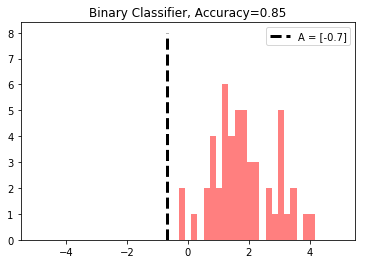

In [22]:
A_result = sess.run(A)
bins = np.linspace(-5, 5, 50)
plt.hist(x_vals[0:50], bins, alpha=0.5,color='white')
plt.hist(x_vals[50:100], bins[0:50], alpha=0.5,color='red')
plt.plot((A_result, A_result), (0, 8), 'k--', linewidth=3,label='A = '+ str(np.round(A_result, 2)))
plt.legend(loc='upper right')
plt.title('Binary Classifier, Accuracy=' + str(np.round(acc_value_test, 2)))
plt.show()